In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import json
import seaborn as sns

In [49]:
with open('58c6dd67-3200-4bf0-8044-a851465edd02.json', 'r') as file:
    data: list = json.load(file)

data.pop(0)
for x in data:
    rm = False
    rm = x['soil_moisture'] == 0
    rm = x['temperature'] == 0
    rm = x['humidity'] == 0

    if rm:
        data.remove(x)

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [50]:
from hashlib import sha256

def plot_subset(
        start: str,
        end: str,
        save_json: bool = False
        ):
    
    subset = df[
        (df['timestamp'] >= start) & (df['timestamp'] <= end)
    ]

    melted = subset.melt(
        id_vars = ['timestamp'],
        value_vars = ['humidity', 'soil_moisture'],
        var_name = "Variable",
        value_name = 'percentages'
    )
    
    # soil moisture and humidity
    fig, ax1 = plt.subplots(figsize = (10, 6))
    sns.lineplot(
        data = melted,
        x = 'timestamp',
        y = 'percentages',
        hue = "Variable", 
        ax = ax1,
        palette = {
            'humidity': 'blue',
            'soil_moisture': 'brown'
        },
        markers = True
    )
    ax1.set_xlabel(" ")
    ax1.xaxis.set_major_formatter(
        mdates.DateFormatter('%I:%M %p\n%Y-%m-%d')
    )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.grid(True)

    # temperature
    ax2 = ax1.twinx()
    sns.lineplot(
        data = subset,
        x = "timestamp",
        y = "temperature",
        ax = ax2,
        color = "orange",
        label = "Temperature (°C)"
    )
    
    handles, labels = ax1.get_legend_handles_labels()
    ax1.set_ylabel("Humidity and Soil Moisture (%)")
    ax1.legend(
        handles = handles,
        labels = [
            "Humidity (%)",
            "Soil Moisture (%)"
        ],
        loc = "upper right"
)

    ax2.set_ylabel("Temperature (°C)")
    ax2.legend(loc="lower left")

    # ax2.set_ylim(29, 32)
    # ax1.set_ylim(65, 95)
    
    plt.title("")
    plt.tight_layout()
    plt.show()

    hashobj = sha256(start.encode())
    fname = str(hashobj.hexdigest())

    subset['timestamp'] = subset['timestamp'].astype(str)
    subset_json = subset.to_dict(orient = "records")
    with open(f"data_subsets/{fname}.json", 'w') as jsonf:
        json.dump(subset_json, jsonf, indent=4)

/tmp/ipykernel_51629/2981791455.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


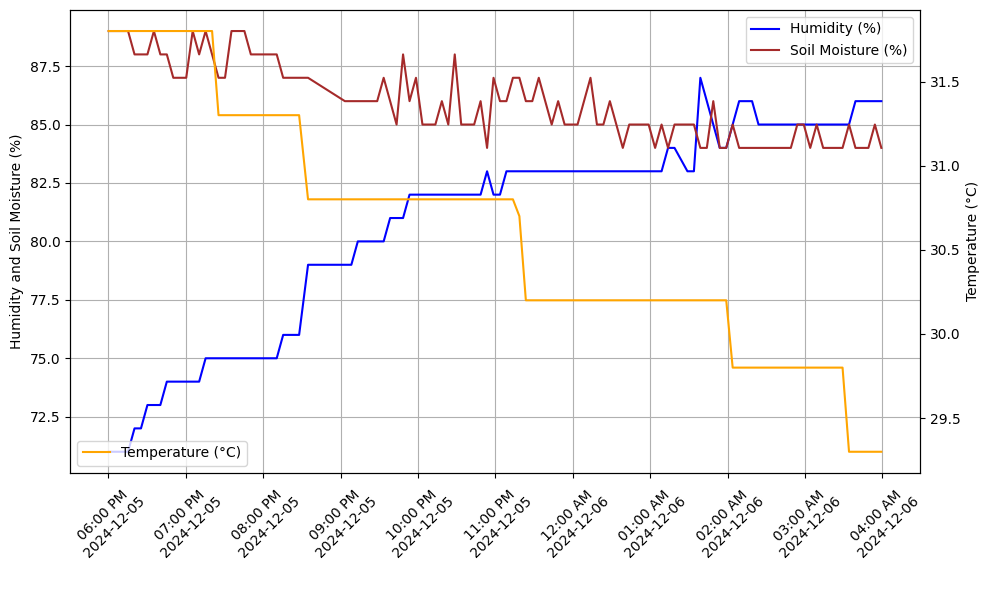

/tmp/ipykernel_51629/2981791455.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['timestamp'] = subset['timestamp'].astype(str)


In [51]:
plot_subset(
    start = "2024-12-05 18:00:00",
    end = "2024-12-06 04:00:00",
    save_json = False
)

/tmp/ipykernel_51629/2981791455.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


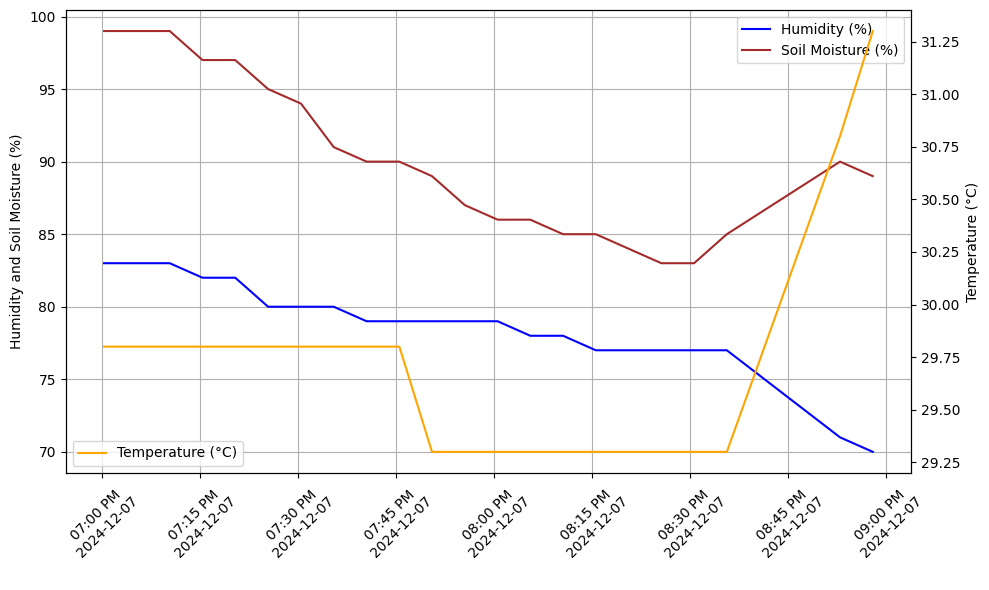

/tmp/ipykernel_51629/2981791455.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['timestamp'] = subset['timestamp'].astype(str)


In [52]:
plot_subset(
    start = "2024-12-07 19:00:00",
    end = "2024-12-07 21:00:00",
    save_json = False
)

/tmp/ipykernel_51629/2981791455.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


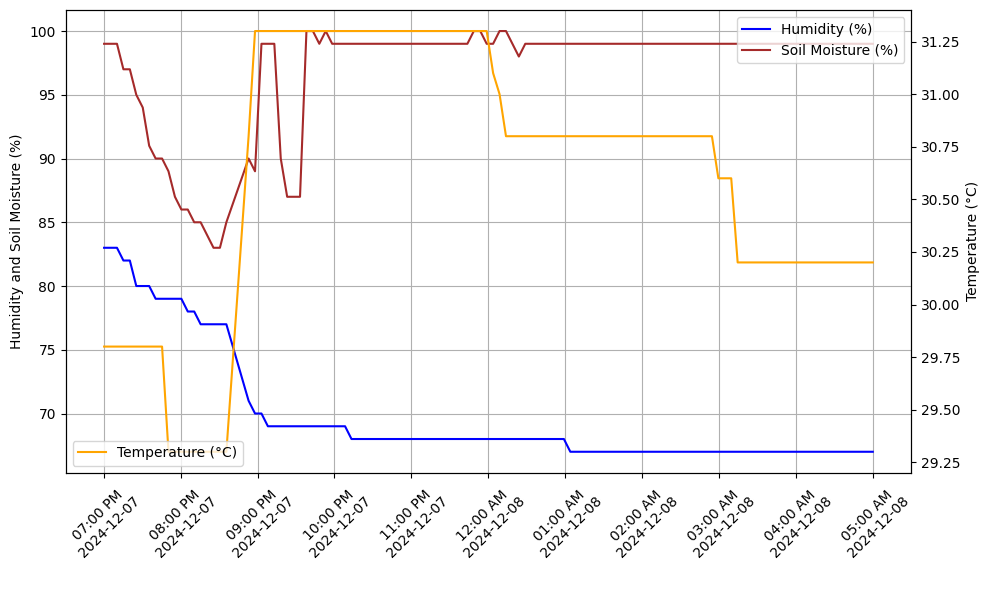

/tmp/ipykernel_51629/2981791455.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['timestamp'] = subset['timestamp'].astype(str)


In [53]:
plot_subset(
    start = "2024-12-07 19:00:00",
    end = "2024-12-08 05:00:00",
    save_json = False
)

/tmp/ipykernel_51629/2981791455.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


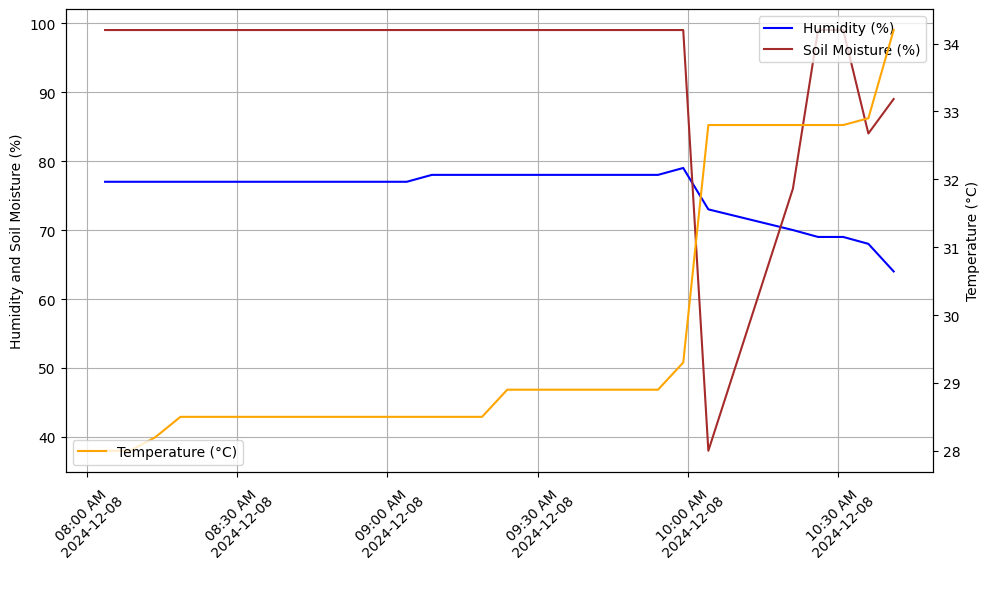

/tmp/ipykernel_51629/2981791455.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['timestamp'] = subset['timestamp'].astype(str)


In [59]:
plot_subset(
    start = "2024-12-08 08:00:00",
    end = "2024-12-08 15:00:00",
    save_json = False
)